In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [ ]:
path = kagglehub.dataset_download("brendan45774/test-file")
print("Path to dataset files:", path)
df = pd.read_csv(f'{path}/tested.csv')
df

Path to dataset files: /kaggle/input/test-file


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# How big is the data?
df.shape

(418, 12)

In [ ]:
# top 5 row
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Are there any duplicate values?
df.duplicated().sum()

np.int64(0)

In [ ]:
# How does the data look mathematically?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Are there any missing values?
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
# How is the correlation between the columns?
numeric_columns = df.select_dtypes(include=['int', 'float'])
# Calculate correlation
correlation_matrix = numeric_columns.corr()
# Display correlation matrix
print(correlation_matrix["Survived"]*100)

PassengerId     -2.324514
Survived       100.000000
Pclass         -10.861452
Age             -0.001268
SibSp            9.994337
Parch           15.912011
Fare            19.151374
Name: Survived, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

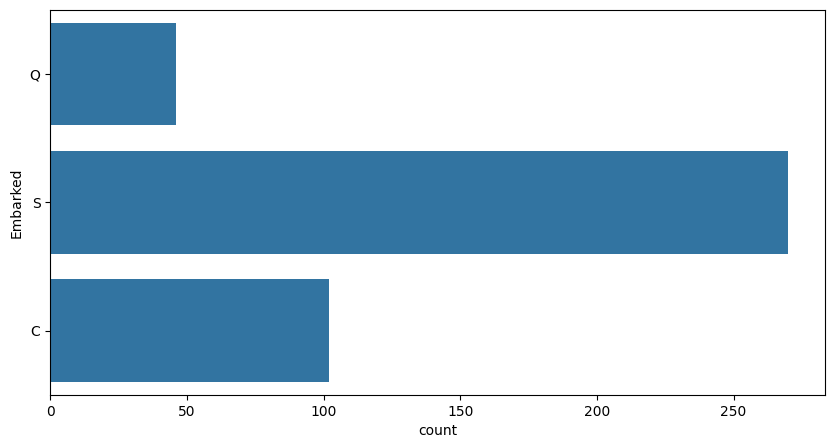

In [ ]:
# # EDA
# # bar plot for embarked value count
plt.figure(figsize=(10,5))
sns.countplot(df["Embarked"])

<Axes: ylabel='count'>

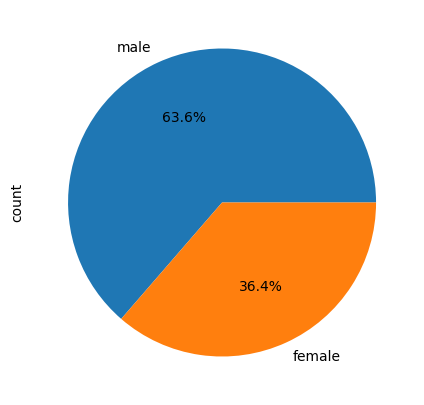

In [ ]:
# pie chart for gender
plt.figure(figsize=(10,5))
df["Sex"].value_counts().plot(kind="pie" , autopct="%1.1f%%")

<Axes: xlabel='Sex', ylabel='Embarked'>

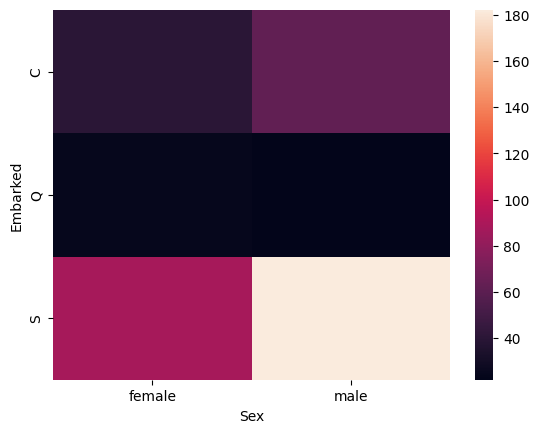

In [ ]:
# heatmap for gender and embarked
sns.heatmap(pd.crosstab(df["Embarked"], df["Sex"]))

In [ ]:
# replacing the missing value with mean of the column
df["Age"].fillna(df["Age"].mean())

,Age
0,34.50000
1,47.00000
2,62.00000
3,27.00000
4,22.00000
...,...
413,30.27259
414,39.00000
415,38.50000
416,30.27259


In [ ]:
#as embarked has only 2 missing value so we are going to use mode.
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())

In [ ]:
#Cabin that has 327 missing value and it is not that useful for us so let's drop it.
df = df.drop("Cabin" , axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df['Fare'].isnull().sum()

np.int64(1)

In [ ]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
# mapping sex column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [ ]:
# encoding embraked column
le1 = LabelEncoder()
df['Embarked'] = le1.fit_transform(df['Embarked'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [ ]:
df["Age"].fillna(df["Age"].mean())

,Age
0,34.50000
1,47.00000
2,62.00000
3,27.00000
4,22.00000
...,...
413,30.27259
414,39.00000
415,38.50000
416,30.27259


In [ ]:
# corrilation
df.select_dtypes(include=['number']).corr().sort_values(by='Survived', ascending=False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,-0.023245,1.000000,-0.108615,-1.000000,-0.000013,0.099943,0.159120,0.191382,-0.076281
Fare,0.008209,0.191382,-0.576619,-0.191382,0.335029,0.171488,0.230001,1.000000,-0.257031
Parch,0.043080,0.159120,0.018721,-0.159120,-0.061249,0.306895,1.000000,0.230001,0.054577
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.091587,1.000000,0.306895,0.171488,0.052708
Age,-0.034102,-0.000013,-0.492143,0.000013,1.000000,-0.091587,-0.061249,0.335029,-0.175848
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.034102,0.003818,0.043080,0.008209,0.040699
Embarked,0.040699,-0.076281,0.227983,0.076281,-0.175848,0.052708,0.054577,-0.257031,1.000000
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.492143,0.001087,0.018721,-0.576619,0.227983
Sex,0.023245,-1.000000,0.108615,1.000000,0.000013,-0.099943,-0.159120,-0.191382,0.076281


In [ ]:
# x and y features
from sklearn.model_selection import train_test_split
df= df.drop(columns= ["Name", "Ticket"])
X = df.drop(columns="Survived")
y= df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size= 0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

